# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [14]:
!pip install matplotlib==2.2.0
!pip install tensorflow==1.4.0
!pip install tensorflow-gpu==1.4.0
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

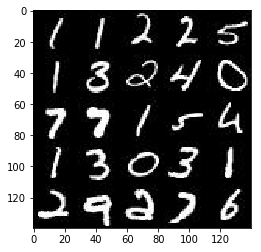

In [15]:
show_n_images = 25

# """
# DON'T MODIFY ANYTHING IN THIS CELL
# """
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

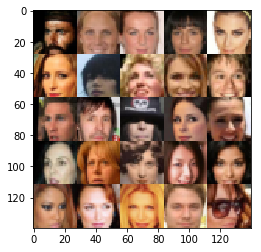

In [16]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [18]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [19]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha=0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28ximage_channels
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [20]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha=0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim now
        
        out = tf.tanh(logits)
        
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [21]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth=0.1
    
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
       
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [22]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs_real, inputs_z, LearningRate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    losses = [] # VMG
    steps=0 # VMG
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, LearningRate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, inputs_real: batch_images, LearningRate: learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4920... Generator Loss: 15.0954
Epoch 1/2... Discriminator Loss: 0.5467... Generator Loss: 7.6626
Epoch 1/2... Discriminator Loss: 0.4547... Generator Loss: 12.3176
Epoch 1/2... Discriminator Loss: 0.3386... Generator Loss: 9.6117
Epoch 1/2... Discriminator Loss: 0.3635... Generator Loss: 5.3753
Epoch 1/2... Discriminator Loss: 2.6636... Generator Loss: 0.3321
Epoch 1/2... Discriminator Loss: 0.5536... Generator Loss: 2.3149
Epoch 1/2... Discriminator Loss: 0.4894... Generator Loss: 4.1445
Epoch 1/2... Discriminator Loss: 0.5598... Generator Loss: 2.0594
Epoch 1/2... Discriminator Loss: 0.4794... Generator Loss: 2.8334


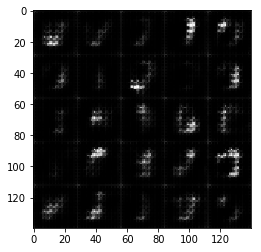

Epoch 1/2... Discriminator Loss: 0.6346... Generator Loss: 2.4295
Epoch 1/2... Discriminator Loss: 2.4013... Generator Loss: 0.1876
Epoch 1/2... Discriminator Loss: 1.1499... Generator Loss: 0.8830
Epoch 1/2... Discriminator Loss: 1.3923... Generator Loss: 0.6474
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 0.9280
Epoch 1/2... Discriminator Loss: 1.0786... Generator Loss: 1.0233
Epoch 1/2... Discriminator Loss: 1.1729... Generator Loss: 1.6080
Epoch 1/2... Discriminator Loss: 1.2932... Generator Loss: 0.6870
Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 1.1522
Epoch 1/2... Discriminator Loss: 1.1827... Generator Loss: 1.2131


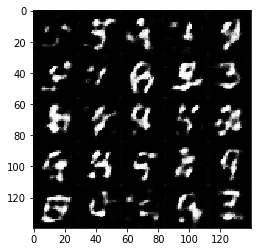

Epoch 1/2... Discriminator Loss: 1.2740... Generator Loss: 0.9351
Epoch 1/2... Discriminator Loss: 1.2027... Generator Loss: 1.9243
Epoch 1/2... Discriminator Loss: 1.7486... Generator Loss: 0.4004
Epoch 1/2... Discriminator Loss: 1.1566... Generator Loss: 0.7352
Epoch 1/2... Discriminator Loss: 1.1711... Generator Loss: 2.0302
Epoch 1/2... Discriminator Loss: 1.5131... Generator Loss: 0.4402
Epoch 1/2... Discriminator Loss: 1.0769... Generator Loss: 1.0234
Epoch 1/2... Discriminator Loss: 1.7661... Generator Loss: 0.3270
Epoch 1/2... Discriminator Loss: 1.2065... Generator Loss: 0.8963
Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 0.8575


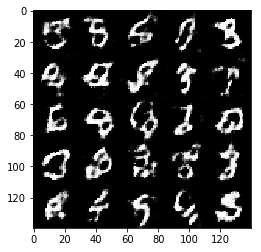

Epoch 1/2... Discriminator Loss: 1.1522... Generator Loss: 1.0963
Epoch 1/2... Discriminator Loss: 1.7094... Generator Loss: 2.9974
Epoch 1/2... Discriminator Loss: 1.1085... Generator Loss: 1.7681
Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 1.8079
Epoch 1/2... Discriminator Loss: 1.2966... Generator Loss: 0.6457
Epoch 1/2... Discriminator Loss: 1.3053... Generator Loss: 1.5846
Epoch 1/2... Discriminator Loss: 1.4770... Generator Loss: 0.4672
Epoch 1/2... Discriminator Loss: 1.2830... Generator Loss: 0.6170
Epoch 1/2... Discriminator Loss: 1.3279... Generator Loss: 0.5464
Epoch 1/2... Discriminator Loss: 1.2517... Generator Loss: 0.6356


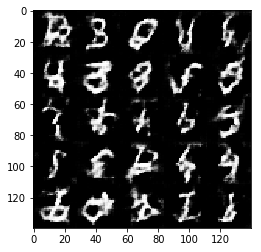

Epoch 1/2... Discriminator Loss: 1.2475... Generator Loss: 0.6633
Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 0.5327
Epoch 1/2... Discriminator Loss: 1.2676... Generator Loss: 2.1233
Epoch 1/2... Discriminator Loss: 1.3499... Generator Loss: 1.8779
Epoch 1/2... Discriminator Loss: 1.4324... Generator Loss: 0.5620
Epoch 1/2... Discriminator Loss: 1.2134... Generator Loss: 0.8894
Epoch 1/2... Discriminator Loss: 1.1615... Generator Loss: 0.7902
Epoch 1/2... Discriminator Loss: 1.3577... Generator Loss: 0.5424
Epoch 1/2... Discriminator Loss: 1.6493... Generator Loss: 0.3640
Epoch 1/2... Discriminator Loss: 2.3416... Generator Loss: 0.2145


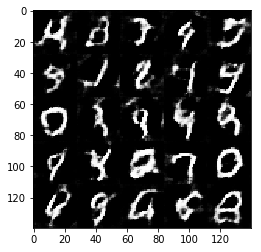

Epoch 1/2... Discriminator Loss: 0.9880... Generator Loss: 1.3129
Epoch 1/2... Discriminator Loss: 0.9842... Generator Loss: 1.6588
Epoch 1/2... Discriminator Loss: 1.4878... Generator Loss: 0.5207
Epoch 1/2... Discriminator Loss: 1.2052... Generator Loss: 1.2404
Epoch 1/2... Discriminator Loss: 1.6429... Generator Loss: 0.3759
Epoch 1/2... Discriminator Loss: 1.4884... Generator Loss: 0.5521
Epoch 1/2... Discriminator Loss: 1.3575... Generator Loss: 0.6778
Epoch 1/2... Discriminator Loss: 1.7426... Generator Loss: 0.3459
Epoch 1/2... Discriminator Loss: 2.5510... Generator Loss: 0.1743
Epoch 1/2... Discriminator Loss: 1.3216... Generator Loss: 0.5918


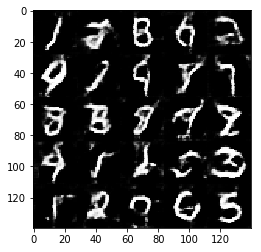

Epoch 1/2... Discriminator Loss: 1.1028... Generator Loss: 0.9785
Epoch 1/2... Discriminator Loss: 1.3221... Generator Loss: 2.4192
Epoch 1/2... Discriminator Loss: 1.1575... Generator Loss: 2.0434
Epoch 1/2... Discriminator Loss: 1.1056... Generator Loss: 0.9661
Epoch 1/2... Discriminator Loss: 1.1750... Generator Loss: 0.9553
Epoch 1/2... Discriminator Loss: 1.4490... Generator Loss: 0.5533
Epoch 1/2... Discriminator Loss: 0.9133... Generator Loss: 1.1620
Epoch 1/2... Discriminator Loss: 1.4711... Generator Loss: 0.5149
Epoch 1/2... Discriminator Loss: 1.7689... Generator Loss: 3.0467
Epoch 1/2... Discriminator Loss: 1.0616... Generator Loss: 1.2977


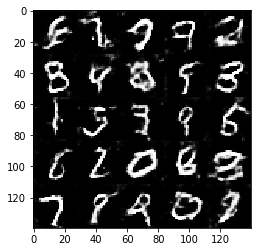

Epoch 1/2... Discriminator Loss: 1.3235... Generator Loss: 0.6506
Epoch 1/2... Discriminator Loss: 0.9537... Generator Loss: 1.1811
Epoch 1/2... Discriminator Loss: 0.9903... Generator Loss: 1.1675
Epoch 1/2... Discriminator Loss: 1.1476... Generator Loss: 1.7169
Epoch 1/2... Discriminator Loss: 1.3222... Generator Loss: 0.8196
Epoch 1/2... Discriminator Loss: 0.9886... Generator Loss: 1.2015
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 1.7790
Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 0.7585
Epoch 1/2... Discriminator Loss: 1.4328... Generator Loss: 0.6423
Epoch 1/2... Discriminator Loss: 1.0741... Generator Loss: 0.9277


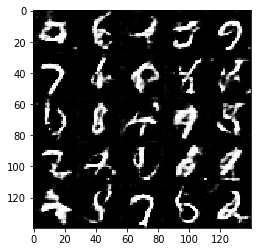

Epoch 1/2... Discriminator Loss: 0.9606... Generator Loss: 1.5280
Epoch 1/2... Discriminator Loss: 1.3992... Generator Loss: 3.3292
Epoch 1/2... Discriminator Loss: 0.9227... Generator Loss: 1.4212
Epoch 1/2... Discriminator Loss: 0.9185... Generator Loss: 1.8570
Epoch 1/2... Discriminator Loss: 1.7852... Generator Loss: 0.4738
Epoch 1/2... Discriminator Loss: 1.1674... Generator Loss: 0.7069
Epoch 1/2... Discriminator Loss: 1.1789... Generator Loss: 0.8086
Epoch 1/2... Discriminator Loss: 1.2941... Generator Loss: 0.6435
Epoch 1/2... Discriminator Loss: 1.0370... Generator Loss: 1.2197
Epoch 1/2... Discriminator Loss: 1.2900... Generator Loss: 0.7569


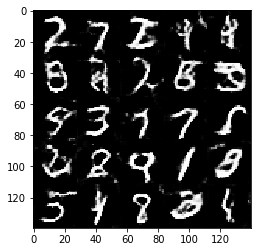

Epoch 1/2... Discriminator Loss: 1.3123... Generator Loss: 0.6371
Epoch 1/2... Discriminator Loss: 1.3179... Generator Loss: 0.6082
Epoch 1/2... Discriminator Loss: 0.9740... Generator Loss: 1.2191
Epoch 1/2... Discriminator Loss: 0.9090... Generator Loss: 1.3572
Epoch 1/2... Discriminator Loss: 0.9854... Generator Loss: 1.0402
Epoch 1/2... Discriminator Loss: 1.9010... Generator Loss: 0.3045
Epoch 1/2... Discriminator Loss: 0.7651... Generator Loss: 1.7678
Epoch 1/2... Discriminator Loss: 1.7686... Generator Loss: 0.3874
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 2.9712
Epoch 1/2... Discriminator Loss: 1.3419... Generator Loss: 2.3178


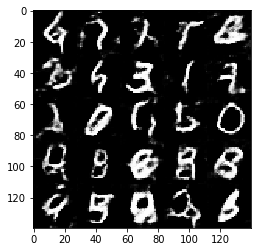

Epoch 1/2... Discriminator Loss: 1.6236... Generator Loss: 0.4639
Epoch 1/2... Discriminator Loss: 0.7703... Generator Loss: 1.6078
Epoch 1/2... Discriminator Loss: 1.0789... Generator Loss: 0.9307
Epoch 1/2... Discriminator Loss: 1.6413... Generator Loss: 0.4630
Epoch 1/2... Discriminator Loss: 0.9898... Generator Loss: 1.0008
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 1.9461
Epoch 1/2... Discriminator Loss: 1.1546... Generator Loss: 1.1302
Epoch 1/2... Discriminator Loss: 0.9171... Generator Loss: 1.5584
Epoch 1/2... Discriminator Loss: 1.0580... Generator Loss: 2.1333
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 0.6273


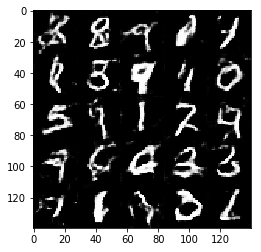

Epoch 1/2... Discriminator Loss: 1.3169... Generator Loss: 0.6266
Epoch 1/2... Discriminator Loss: 0.9277... Generator Loss: 1.4077
Epoch 1/2... Discriminator Loss: 1.3953... Generator Loss: 0.6047
Epoch 1/2... Discriminator Loss: 1.3665... Generator Loss: 0.5596
Epoch 1/2... Discriminator Loss: 1.5266... Generator Loss: 0.5614
Epoch 1/2... Discriminator Loss: 1.3037... Generator Loss: 0.6894
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 0.7817
Epoch 1/2... Discriminator Loss: 0.8457... Generator Loss: 1.1871
Epoch 1/2... Discriminator Loss: 1.7954... Generator Loss: 0.4577
Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.6753


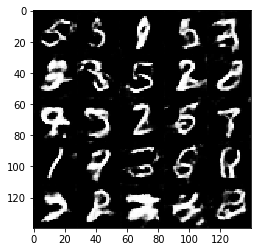

Epoch 1/2... Discriminator Loss: 1.4116... Generator Loss: 0.5325
Epoch 1/2... Discriminator Loss: 0.9474... Generator Loss: 1.2109
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 0.8399
Epoch 1/2... Discriminator Loss: 0.7103... Generator Loss: 1.8139
Epoch 1/2... Discriminator Loss: 1.1051... Generator Loss: 0.8743
Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 0.7868
Epoch 1/2... Discriminator Loss: 0.9079... Generator Loss: 1.1055
Epoch 1/2... Discriminator Loss: 2.3167... Generator Loss: 3.8965
Epoch 1/2... Discriminator Loss: 0.8724... Generator Loss: 1.2866
Epoch 1/2... Discriminator Loss: 1.0875... Generator Loss: 1.8008


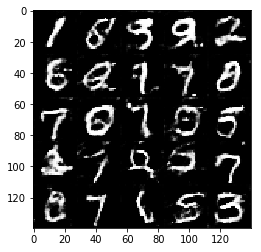

Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 1.0806
Epoch 1/2... Discriminator Loss: 1.4710... Generator Loss: 0.5365
Epoch 1/2... Discriminator Loss: 1.9344... Generator Loss: 0.4090
Epoch 1/2... Discriminator Loss: 0.9431... Generator Loss: 1.9221
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 0.9254
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.8808
Epoch 1/2... Discriminator Loss: 2.0159... Generator Loss: 0.4566
Epoch 1/2... Discriminator Loss: 1.7999... Generator Loss: 0.4503
Epoch 1/2... Discriminator Loss: 1.0309... Generator Loss: 0.9452
Epoch 1/2... Discriminator Loss: 1.0675... Generator Loss: 1.0208


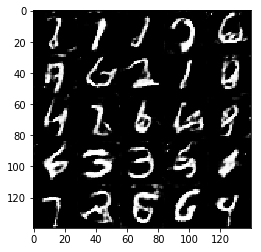

Epoch 1/2... Discriminator Loss: 1.5379... Generator Loss: 0.5635
Epoch 1/2... Discriminator Loss: 1.1371... Generator Loss: 0.8849
Epoch 1/2... Discriminator Loss: 1.4908... Generator Loss: 0.5092
Epoch 1/2... Discriminator Loss: 0.8517... Generator Loss: 2.0856
Epoch 1/2... Discriminator Loss: 1.2080... Generator Loss: 0.7787
Epoch 1/2... Discriminator Loss: 0.7754... Generator Loss: 1.3405
Epoch 1/2... Discriminator Loss: 1.1141... Generator Loss: 0.8653
Epoch 1/2... Discriminator Loss: 0.9829... Generator Loss: 0.9820
Epoch 1/2... Discriminator Loss: 1.9377... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 1.1516... Generator Loss: 0.7768


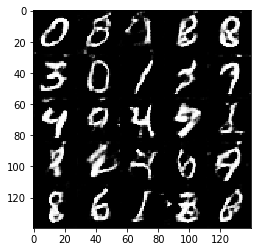

Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 0.5892
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 0.8714
Epoch 1/2... Discriminator Loss: 0.9054... Generator Loss: 2.1352
Epoch 1/2... Discriminator Loss: 0.9691... Generator Loss: 1.8283
Epoch 1/2... Discriminator Loss: 0.9923... Generator Loss: 1.1453
Epoch 1/2... Discriminator Loss: 0.8180... Generator Loss: 2.4347
Epoch 1/2... Discriminator Loss: 0.6943... Generator Loss: 1.5099
Epoch 1/2... Discriminator Loss: 2.5328... Generator Loss: 0.2321
Epoch 1/2... Discriminator Loss: 1.5407... Generator Loss: 0.5472
Epoch 1/2... Discriminator Loss: 2.3987... Generator Loss: 0.2731


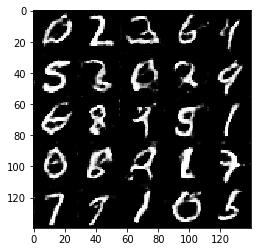

Epoch 1/2... Discriminator Loss: 1.2269... Generator Loss: 0.7954
Epoch 1/2... Discriminator Loss: 2.8822... Generator Loss: 0.1495
Epoch 1/2... Discriminator Loss: 0.7474... Generator Loss: 1.4912
Epoch 1/2... Discriminator Loss: 0.8855... Generator Loss: 1.0740
Epoch 1/2... Discriminator Loss: 0.8679... Generator Loss: 1.3588
Epoch 1/2... Discriminator Loss: 1.7620... Generator Loss: 3.4088
Epoch 1/2... Discriminator Loss: 0.6922... Generator Loss: 1.5669
Epoch 1/2... Discriminator Loss: 0.9187... Generator Loss: 1.4435
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 0.7508
Epoch 1/2... Discriminator Loss: 1.0458... Generator Loss: 0.8157


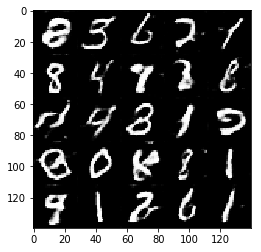

Epoch 1/2... Discriminator Loss: 0.7177... Generator Loss: 1.7249
Epoch 1/2... Discriminator Loss: 0.9155... Generator Loss: 1.3971
Epoch 1/2... Discriminator Loss: 0.8189... Generator Loss: 1.2424
Epoch 1/2... Discriminator Loss: 1.0718... Generator Loss: 0.8301
Epoch 1/2... Discriminator Loss: 0.8809... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 1.3654... Generator Loss: 0.6663
Epoch 1/2... Discriminator Loss: 0.8469... Generator Loss: 1.1888
Epoch 1/2... Discriminator Loss: 0.9251... Generator Loss: 1.0393
Epoch 1/2... Discriminator Loss: 1.2970... Generator Loss: 0.6726
Epoch 1/2... Discriminator Loss: 1.2093... Generator Loss: 0.6598


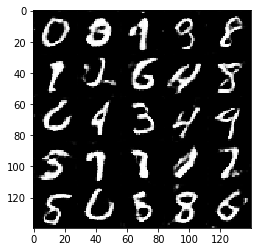

Epoch 1/2... Discriminator Loss: 1.4280... Generator Loss: 0.6977
Epoch 1/2... Discriminator Loss: 0.7556... Generator Loss: 1.7377
Epoch 1/2... Discriminator Loss: 0.9955... Generator Loss: 0.9445
Epoch 1/2... Discriminator Loss: 1.2683... Generator Loss: 0.9524
Epoch 1/2... Discriminator Loss: 1.1162... Generator Loss: 0.8872
Epoch 1/2... Discriminator Loss: 1.1962... Generator Loss: 2.9640
Epoch 1/2... Discriminator Loss: 0.9700... Generator Loss: 2.0911
Epoch 2/2... Discriminator Loss: 0.9912... Generator Loss: 1.0429
Epoch 2/2... Discriminator Loss: 1.1804... Generator Loss: 0.7836
Epoch 2/2... Discriminator Loss: 1.2416... Generator Loss: 0.7704


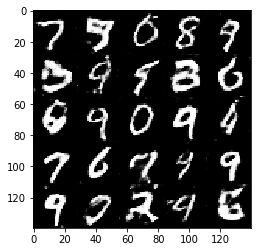

Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 1.4327
Epoch 2/2... Discriminator Loss: 0.7032... Generator Loss: 1.4403
Epoch 2/2... Discriminator Loss: 1.6168... Generator Loss: 0.4276
Epoch 2/2... Discriminator Loss: 0.8096... Generator Loss: 1.1874
Epoch 2/2... Discriminator Loss: 1.8037... Generator Loss: 0.5244
Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 1.0495
Epoch 2/2... Discriminator Loss: 0.8399... Generator Loss: 1.2306
Epoch 2/2... Discriminator Loss: 0.8906... Generator Loss: 1.1401
Epoch 2/2... Discriminator Loss: 1.4728... Generator Loss: 0.4903
Epoch 2/2... Discriminator Loss: 0.6831... Generator Loss: 1.8464


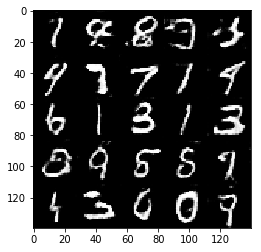

Epoch 2/2... Discriminator Loss: 0.8190... Generator Loss: 1.2435
Epoch 2/2... Discriminator Loss: 2.3066... Generator Loss: 0.2186
Epoch 2/2... Discriminator Loss: 1.0771... Generator Loss: 0.8786
Epoch 2/2... Discriminator Loss: 0.7976... Generator Loss: 1.3020
Epoch 2/2... Discriminator Loss: 1.4688... Generator Loss: 0.5616
Epoch 2/2... Discriminator Loss: 1.5197... Generator Loss: 0.6950
Epoch 2/2... Discriminator Loss: 1.9569... Generator Loss: 0.3639
Epoch 2/2... Discriminator Loss: 2.4869... Generator Loss: 0.2835
Epoch 2/2... Discriminator Loss: 1.2088... Generator Loss: 0.8379
Epoch 2/2... Discriminator Loss: 1.1056... Generator Loss: 0.9050


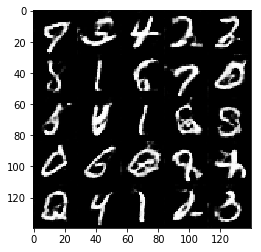

Epoch 2/2... Discriminator Loss: 2.0308... Generator Loss: 0.4061
Epoch 2/2... Discriminator Loss: 1.8264... Generator Loss: 0.4705
Epoch 2/2... Discriminator Loss: 0.8502... Generator Loss: 1.2485
Epoch 2/2... Discriminator Loss: 1.5328... Generator Loss: 0.6916
Epoch 2/2... Discriminator Loss: 1.2681... Generator Loss: 2.9882
Epoch 2/2... Discriminator Loss: 1.5831... Generator Loss: 0.5466
Epoch 2/2... Discriminator Loss: 1.0480... Generator Loss: 1.0241
Epoch 2/2... Discriminator Loss: 1.0649... Generator Loss: 0.8639
Epoch 2/2... Discriminator Loss: 1.5113... Generator Loss: 0.5060
Epoch 2/2... Discriminator Loss: 1.1389... Generator Loss: 0.9314


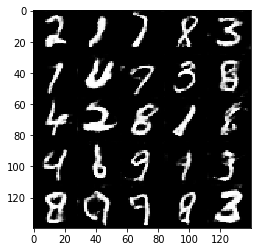

Epoch 2/2... Discriminator Loss: 1.0418... Generator Loss: 2.5570
Epoch 2/2... Discriminator Loss: 0.5242... Generator Loss: 2.2668
Epoch 2/2... Discriminator Loss: 1.0413... Generator Loss: 1.0394
Epoch 2/2... Discriminator Loss: 1.3296... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 0.7909... Generator Loss: 1.4162
Epoch 2/2... Discriminator Loss: 1.1001... Generator Loss: 1.0050
Epoch 2/2... Discriminator Loss: 1.7930... Generator Loss: 0.4042
Epoch 2/2... Discriminator Loss: 0.7705... Generator Loss: 1.9058
Epoch 2/2... Discriminator Loss: 0.6828... Generator Loss: 1.7527
Epoch 2/2... Discriminator Loss: 1.0837... Generator Loss: 0.8816


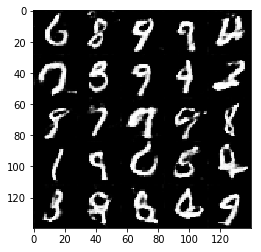

Epoch 2/2... Discriminator Loss: 0.6649... Generator Loss: 1.6442
Epoch 2/2... Discriminator Loss: 0.6963... Generator Loss: 1.7828
Epoch 2/2... Discriminator Loss: 0.9743... Generator Loss: 0.8989
Epoch 2/2... Discriminator Loss: 1.1197... Generator Loss: 0.8974
Epoch 2/2... Discriminator Loss: 2.1004... Generator Loss: 0.4108
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 2.2140
Epoch 2/2... Discriminator Loss: 1.3250... Generator Loss: 0.6136
Epoch 2/2... Discriminator Loss: 2.0634... Generator Loss: 0.3486
Epoch 2/2... Discriminator Loss: 0.7623... Generator Loss: 1.3804
Epoch 2/2... Discriminator Loss: 0.8440... Generator Loss: 1.2027


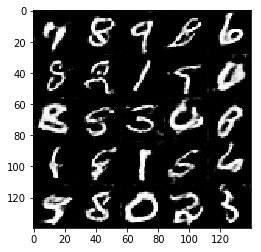

Epoch 2/2... Discriminator Loss: 1.8569... Generator Loss: 0.4459
Epoch 2/2... Discriminator Loss: 1.5179... Generator Loss: 0.7535
Epoch 2/2... Discriminator Loss: 0.9344... Generator Loss: 1.9144
Epoch 2/2... Discriminator Loss: 1.5790... Generator Loss: 0.5472
Epoch 2/2... Discriminator Loss: 1.0101... Generator Loss: 1.0765
Epoch 2/2... Discriminator Loss: 0.7863... Generator Loss: 1.6009
Epoch 2/2... Discriminator Loss: 1.8531... Generator Loss: 0.3935
Epoch 2/2... Discriminator Loss: 1.1578... Generator Loss: 0.8145
Epoch 2/2... Discriminator Loss: 0.9543... Generator Loss: 1.0684
Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 0.8681


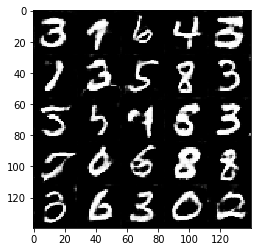

Epoch 2/2... Discriminator Loss: 0.9650... Generator Loss: 0.9620
Epoch 2/2... Discriminator Loss: 1.0422... Generator Loss: 0.9301
Epoch 2/2... Discriminator Loss: 0.7343... Generator Loss: 1.8831
Epoch 2/2... Discriminator Loss: 0.8184... Generator Loss: 1.4504
Epoch 2/2... Discriminator Loss: 0.8586... Generator Loss: 1.1722
Epoch 2/2... Discriminator Loss: 1.1828... Generator Loss: 0.7528
Epoch 2/2... Discriminator Loss: 0.7852... Generator Loss: 1.3199
Epoch 2/2... Discriminator Loss: 0.9263... Generator Loss: 1.1862
Epoch 2/2... Discriminator Loss: 1.2232... Generator Loss: 0.8409
Epoch 2/2... Discriminator Loss: 0.7924... Generator Loss: 1.4391


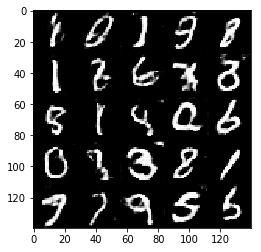

Epoch 2/2... Discriminator Loss: 0.8789... Generator Loss: 1.1902
Epoch 2/2... Discriminator Loss: 0.8481... Generator Loss: 1.4443
Epoch 2/2... Discriminator Loss: 0.5453... Generator Loss: 2.4013
Epoch 2/2... Discriminator Loss: 1.0658... Generator Loss: 0.9266
Epoch 2/2... Discriminator Loss: 1.9165... Generator Loss: 0.3944
Epoch 2/2... Discriminator Loss: 0.7352... Generator Loss: 1.4788
Epoch 2/2... Discriminator Loss: 2.8756... Generator Loss: 0.1832
Epoch 2/2... Discriminator Loss: 1.0521... Generator Loss: 1.0104
Epoch 2/2... Discriminator Loss: 0.7635... Generator Loss: 1.8685
Epoch 2/2... Discriminator Loss: 1.2362... Generator Loss: 0.6792


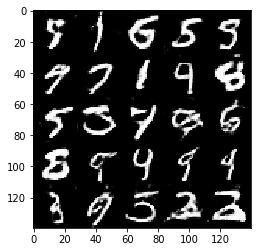

Epoch 2/2... Discriminator Loss: 0.6413... Generator Loss: 1.7091
Epoch 2/2... Discriminator Loss: 1.6933... Generator Loss: 0.4520
Epoch 2/2... Discriminator Loss: 0.9101... Generator Loss: 1.1645
Epoch 2/2... Discriminator Loss: 0.7300... Generator Loss: 1.4174
Epoch 2/2... Discriminator Loss: 2.5266... Generator Loss: 0.2027
Epoch 2/2... Discriminator Loss: 1.0806... Generator Loss: 0.8247
Epoch 2/2... Discriminator Loss: 1.0424... Generator Loss: 0.9205
Epoch 2/2... Discriminator Loss: 1.3121... Generator Loss: 0.7173
Epoch 2/2... Discriminator Loss: 1.3637... Generator Loss: 0.6580
Epoch 2/2... Discriminator Loss: 1.1411... Generator Loss: 0.7364


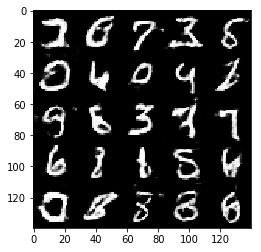

Epoch 2/2... Discriminator Loss: 0.7267... Generator Loss: 1.3647
Epoch 2/2... Discriminator Loss: 1.3442... Generator Loss: 0.7501
Epoch 2/2... Discriminator Loss: 0.8910... Generator Loss: 1.1856
Epoch 2/2... Discriminator Loss: 1.3867... Generator Loss: 0.6643
Epoch 2/2... Discriminator Loss: 1.2461... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 1.0841... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 1.6116... Generator Loss: 0.6310
Epoch 2/2... Discriminator Loss: 0.8836... Generator Loss: 1.1113
Epoch 2/2... Discriminator Loss: 1.1812... Generator Loss: 0.8067
Epoch 2/2... Discriminator Loss: 0.7470... Generator Loss: 1.3753


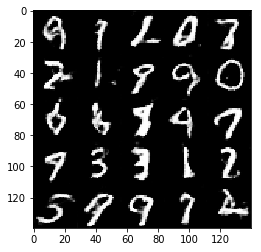

Epoch 2/2... Discriminator Loss: 1.0527... Generator Loss: 0.9674
Epoch 2/2... Discriminator Loss: 0.9275... Generator Loss: 1.1097
Epoch 2/2... Discriminator Loss: 1.4468... Generator Loss: 0.6494
Epoch 2/2... Discriminator Loss: 2.9791... Generator Loss: 0.1662
Epoch 2/2... Discriminator Loss: 1.1008... Generator Loss: 0.9940
Epoch 2/2... Discriminator Loss: 0.9262... Generator Loss: 1.0714
Epoch 2/2... Discriminator Loss: 1.1430... Generator Loss: 0.7701
Epoch 2/2... Discriminator Loss: 0.6694... Generator Loss: 1.7267
Epoch 2/2... Discriminator Loss: 1.0294... Generator Loss: 0.9833
Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.1002


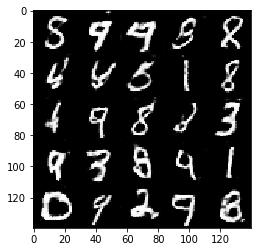

Epoch 2/2... Discriminator Loss: 0.7768... Generator Loss: 1.4126
Epoch 2/2... Discriminator Loss: 0.7984... Generator Loss: 1.2308
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.2278
Epoch 2/2... Discriminator Loss: 0.8256... Generator Loss: 1.4159
Epoch 2/2... Discriminator Loss: 1.6460... Generator Loss: 0.5259
Epoch 2/2... Discriminator Loss: 1.0587... Generator Loss: 0.8640
Epoch 2/2... Discriminator Loss: 1.2555... Generator Loss: 0.7184
Epoch 2/2... Discriminator Loss: 1.4595... Generator Loss: 0.5615
Epoch 2/2... Discriminator Loss: 1.0919... Generator Loss: 0.8986
Epoch 2/2... Discriminator Loss: 1.3267... Generator Loss: 0.6386


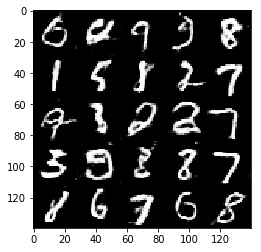

Epoch 2/2... Discriminator Loss: 0.7702... Generator Loss: 1.2698
Epoch 2/2... Discriminator Loss: 0.9952... Generator Loss: 0.9831
Epoch 2/2... Discriminator Loss: 1.1625... Generator Loss: 0.8321
Epoch 2/2... Discriminator Loss: 1.0541... Generator Loss: 0.8900
Epoch 2/2... Discriminator Loss: 0.5207... Generator Loss: 2.0068
Epoch 2/2... Discriminator Loss: 2.4976... Generator Loss: 0.1992
Epoch 2/2... Discriminator Loss: 1.4358... Generator Loss: 0.6823
Epoch 2/2... Discriminator Loss: 1.7343... Generator Loss: 0.4981
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.2699
Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 1.6279


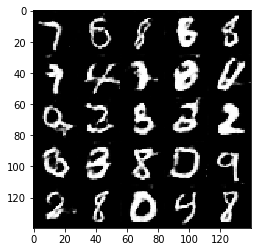

Epoch 2/2... Discriminator Loss: 0.8054... Generator Loss: 1.3524
Epoch 2/2... Discriminator Loss: 2.7107... Generator Loss: 0.2073
Epoch 2/2... Discriminator Loss: 0.6232... Generator Loss: 2.1414
Epoch 2/2... Discriminator Loss: 1.1543... Generator Loss: 0.8471
Epoch 2/2... Discriminator Loss: 0.7211... Generator Loss: 2.0575
Epoch 2/2... Discriminator Loss: 1.2383... Generator Loss: 0.7945
Epoch 2/2... Discriminator Loss: 0.7597... Generator Loss: 1.4894
Epoch 2/2... Discriminator Loss: 0.6870... Generator Loss: 1.7892
Epoch 2/2... Discriminator Loss: 0.7809... Generator Loss: 1.3234
Epoch 2/2... Discriminator Loss: 0.7782... Generator Loss: 1.3332


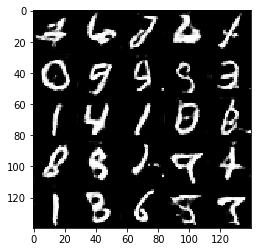

Epoch 2/2... Discriminator Loss: 0.6827... Generator Loss: 1.6949
Epoch 2/2... Discriminator Loss: 0.9493... Generator Loss: 1.4727
Epoch 2/2... Discriminator Loss: 1.1901... Generator Loss: 0.7958
Epoch 2/2... Discriminator Loss: 0.9354... Generator Loss: 1.0552
Epoch 2/2... Discriminator Loss: 0.8575... Generator Loss: 1.1095
Epoch 2/2... Discriminator Loss: 0.4969... Generator Loss: 2.3353
Epoch 2/2... Discriminator Loss: 1.0122... Generator Loss: 0.9442
Epoch 2/2... Discriminator Loss: 0.7815... Generator Loss: 3.5105
Epoch 2/2... Discriminator Loss: 0.5611... Generator Loss: 2.1312
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 1.4854


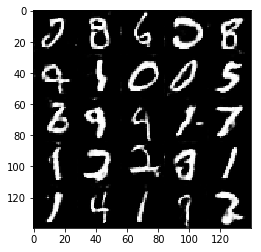

Epoch 2/2... Discriminator Loss: 0.6855... Generator Loss: 1.5089
Epoch 2/2... Discriminator Loss: 1.8684... Generator Loss: 0.4681
Epoch 2/2... Discriminator Loss: 0.9861... Generator Loss: 0.9008
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.4740
Epoch 2/2... Discriminator Loss: 0.5402... Generator Loss: 2.1017
Epoch 2/2... Discriminator Loss: 0.6848... Generator Loss: 1.5698
Epoch 2/2... Discriminator Loss: 0.9487... Generator Loss: 1.2155
Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.3328
Epoch 2/2... Discriminator Loss: 1.0928... Generator Loss: 0.8529
Epoch 2/2... Discriminator Loss: 0.7859... Generator Loss: 1.1912


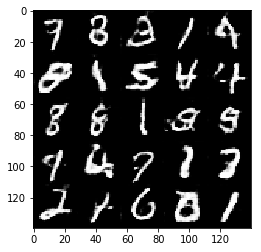

Epoch 2/2... Discriminator Loss: 2.3305... Generator Loss: 0.2719
Epoch 2/2... Discriminator Loss: 1.3884... Generator Loss: 0.7507
Epoch 2/2... Discriminator Loss: 1.4856... Generator Loss: 0.7081
Epoch 2/2... Discriminator Loss: 1.2320... Generator Loss: 0.6988
Epoch 2/2... Discriminator Loss: 0.4581... Generator Loss: 3.1201
Epoch 2/2... Discriminator Loss: 0.7426... Generator Loss: 1.4235
Epoch 2/2... Discriminator Loss: 0.7177... Generator Loss: 1.5101
Epoch 2/2... Discriminator Loss: 0.9138... Generator Loss: 1.2041
Epoch 2/2... Discriminator Loss: 0.6929... Generator Loss: 1.5921
Epoch 2/2... Discriminator Loss: 0.8303... Generator Loss: 1.1827


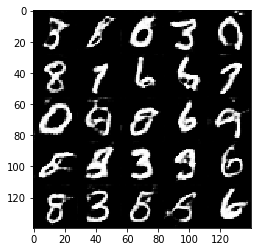

Epoch 2/2... Discriminator Loss: 1.7386... Generator Loss: 0.5317
Epoch 2/2... Discriminator Loss: 2.2533... Generator Loss: 0.3167
Epoch 2/2... Discriminator Loss: 0.6855... Generator Loss: 1.7655
Epoch 2/2... Discriminator Loss: 0.6649... Generator Loss: 1.6273
Epoch 2/2... Discriminator Loss: 0.9544... Generator Loss: 0.9504
Epoch 2/2... Discriminator Loss: 0.8666... Generator Loss: 1.1989
Epoch 2/2... Discriminator Loss: 1.0768... Generator Loss: 1.8803
Epoch 2/2... Discriminator Loss: 0.8219... Generator Loss: 1.7090
Epoch 2/2... Discriminator Loss: 0.7554... Generator Loss: 2.3386
Epoch 2/2... Discriminator Loss: 0.7889... Generator Loss: 1.3290


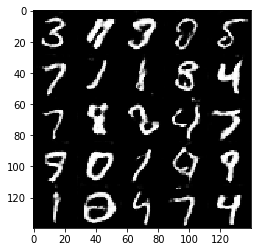

Epoch 2/2... Discriminator Loss: 2.1595... Generator Loss: 0.3198
Epoch 2/2... Discriminator Loss: 0.6843... Generator Loss: 1.8813
Epoch 2/2... Discriminator Loss: 1.2932... Generator Loss: 0.6373
Epoch 2/2... Discriminator Loss: 1.0303... Generator Loss: 0.9174
Epoch 2/2... Discriminator Loss: 1.6939... Generator Loss: 0.4242


In [27]:
batch_size = 32
z_dim = 100
learning_rate = 0.002 
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8085... Generator Loss: 2.7571
Epoch 1/1... Discriminator Loss: 2.8974... Generator Loss: 0.2034
Epoch 1/1... Discriminator Loss: 0.7026... Generator Loss: 2.3949
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 4.1003
Epoch 1/1... Discriminator Loss: 0.6961... Generator Loss: 4.0775
Epoch 1/1... Discriminator Loss: 0.7730... Generator Loss: 1.4600
Epoch 1/1... Discriminator Loss: 0.8005... Generator Loss: 3.5535
Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 2.3693... Generator Loss: 3.9027
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.7779


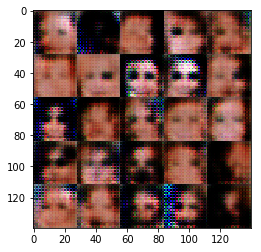

Epoch 1/1... Discriminator Loss: 1.5521... Generator Loss: 0.4609
Epoch 1/1... Discriminator Loss: 1.5384... Generator Loss: 1.6455
Epoch 1/1... Discriminator Loss: 0.7638... Generator Loss: 1.4125
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 1.3937
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 2.1826... Generator Loss: 0.2182
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 1.0836
Epoch 1/1... Discriminator Loss: 1.7474... Generator Loss: 3.1877
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 0.8591... Generator Loss: 1.3004


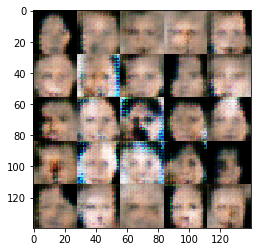

Epoch 1/1... Discriminator Loss: 1.1645... Generator Loss: 0.7995
Epoch 1/1... Discriminator Loss: 1.0881... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.5181... Generator Loss: 0.4409
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 1.0957
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 0.9510
Epoch 1/1... Discriminator Loss: 1.8506... Generator Loss: 0.3127
Epoch 1/1... Discriminator Loss: 1.3295... Generator Loss: 0.5931
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 1.2061
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.9439


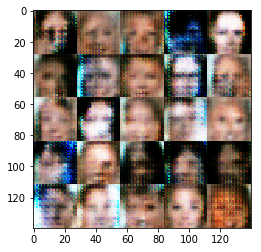

Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 1.1085
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.6371
Epoch 1/1... Discriminator Loss: 1.2791... Generator Loss: 2.2536
Epoch 1/1... Discriminator Loss: 1.6581... Generator Loss: 1.8297
Epoch 1/1... Discriminator Loss: 1.1993... Generator Loss: 0.9757
Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 1.0524
Epoch 1/1... Discriminator Loss: 1.1958... Generator Loss: 0.8198
Epoch 1/1... Discriminator Loss: 1.4773... Generator Loss: 1.0397
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.5844


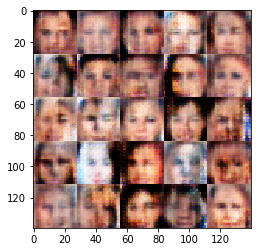

Epoch 1/1... Discriminator Loss: 2.5632... Generator Loss: 0.1551
Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.2051... Generator Loss: 0.8876
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.9566
Epoch 1/1... Discriminator Loss: 1.7142... Generator Loss: 0.4657
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.7362
Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.6960
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 1.0620


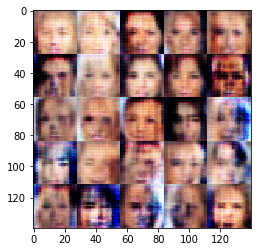

Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 1.9890... Generator Loss: 0.3870
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.9621
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.8789
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.9758
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 1.0231


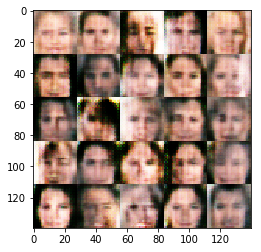

Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 1.1469
Epoch 1/1... Discriminator Loss: 1.4680... Generator Loss: 0.8968
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.8451
Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.9375
Epoch 1/1... Discriminator Loss: 1.4611... Generator Loss: 0.6314
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4985... Generator Loss: 0.4972


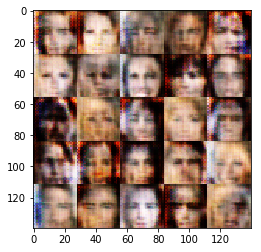

Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7309
Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.4628... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.0685... Generator Loss: 0.7790
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.8716
Epoch 1/1... Discriminator Loss: 1.5751... Generator Loss: 0.9576
Epoch 1/1... Discriminator Loss: 1.0725... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.3848... Generator Loss: 0.6502
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.9827
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 1.2403


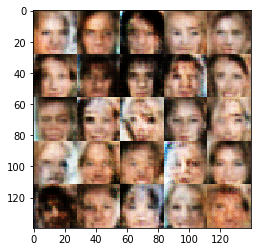

Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 0.9052
Epoch 1/1... Discriminator Loss: 1.2853... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.9000
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 1.5675
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 0.6598
Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 1.2078
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.7195


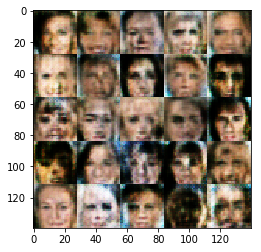

Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.6232... Generator Loss: 1.3939
Epoch 1/1... Discriminator Loss: 1.2834... Generator Loss: 0.9825
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.8470
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 1.8301
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 1.0366
Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.6606
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.7119


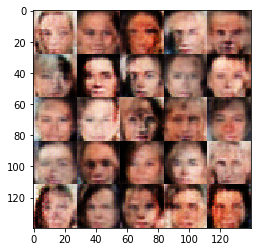

Epoch 1/1... Discriminator Loss: 1.5067... Generator Loss: 0.4715
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.7014... Generator Loss: 1.2617
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 1.1855
Epoch 1/1... Discriminator Loss: 1.4357... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 0.9040
Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.8980


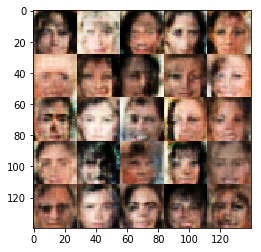

Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 1.3025
Epoch 1/1... Discriminator Loss: 1.4712... Generator Loss: 0.7602
Epoch 1/1... Discriminator Loss: 1.3535... Generator Loss: 0.9884
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.9908
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.9438... Generator Loss: 0.3236
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.7179


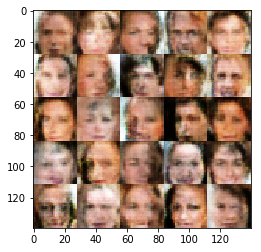

Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.6173
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.9112
Epoch 1/1... Discriminator Loss: 1.5646... Generator Loss: 1.3414
Epoch 1/1... Discriminator Loss: 1.8229... Generator Loss: 0.2963
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.7662
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.8132
Epoch 1/1... Discriminator Loss: 1.2417... Generator Loss: 0.8141
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 1.4792


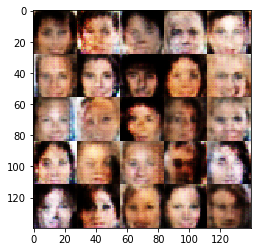

Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.1541... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.9736
Epoch 1/1... Discriminator Loss: 1.2755... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 1.1977
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 1.1850
Epoch 1/1... Discriminator Loss: 1.5785... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.0680... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.4826... Generator Loss: 0.4851


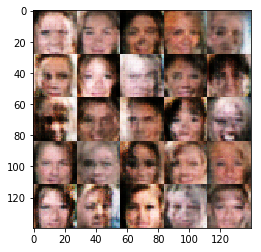

Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.8547
Epoch 1/1... Discriminator Loss: 1.2048... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.3350... Generator Loss: 0.9767
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.3158... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.6525
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 0.9834
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 1.0123
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 1.2253


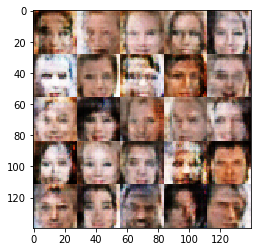

Epoch 1/1... Discriminator Loss: 1.4570... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 0.9706
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.5397
Epoch 1/1... Discriminator Loss: 1.4802... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 1.1963... Generator Loss: 0.8400
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 0.8863


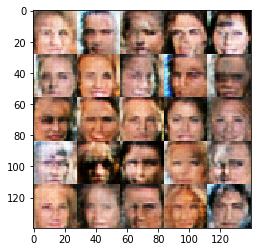

Epoch 1/1... Discriminator Loss: 1.0731... Generator Loss: 1.0862
Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 1.2815
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 1.1295
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 0.7354
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.9683
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.9229
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.5390
Epoch 1/1... Discriminator Loss: 1.4820... Generator Loss: 1.0683
Epoch 1/1... Discriminator Loss: 1.1264... Generator Loss: 0.9978
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6402


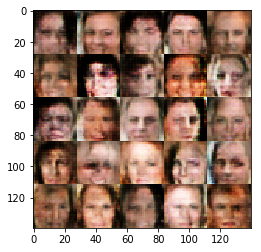

Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.2649... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.2587... Generator Loss: 0.8493
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 0.9310
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.8947
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 1.4050


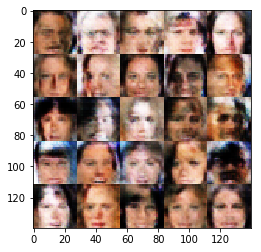

Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.8655
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.6218
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.8485
Epoch 1/1... Discriminator Loss: 1.0263... Generator Loss: 1.0738
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.0136
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 1.5457... Generator Loss: 0.6341
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 1.0592
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.9169


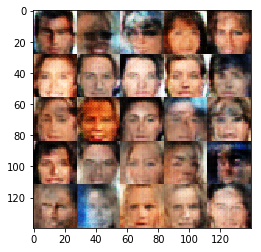

Epoch 1/1... Discriminator Loss: 1.2874... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.5642
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 0.5292
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6334
Epoch 1/1... Discriminator Loss: 1.2865... Generator Loss: 1.0447
Epoch 1/1... Discriminator Loss: 1.3082... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 0.9718
Epoch 1/1... Discriminator Loss: 1.1353... Generator Loss: 0.8869
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.5329


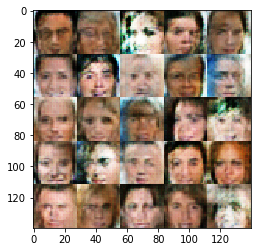

Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 0.8599
Epoch 1/1... Discriminator Loss: 1.1657... Generator Loss: 0.7665
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.9981
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 0.8286
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.2968... Generator Loss: 0.8877
Epoch 1/1... Discriminator Loss: 1.4492... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.1617... Generator Loss: 0.8925


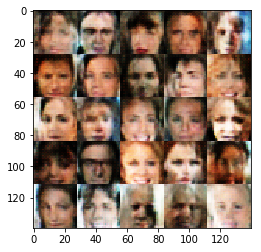

Epoch 1/1... Discriminator Loss: 1.8883... Generator Loss: 2.1030
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.9811
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.2074... Generator Loss: 0.8343
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.9534
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.1750... Generator Loss: 0.9419
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 1.0759


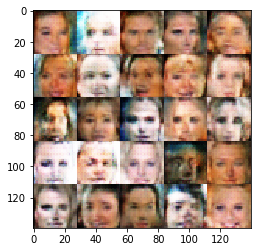

Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.6548
Epoch 1/1... Discriminator Loss: 1.2742... Generator Loss: 0.8082
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.3426
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 1.0557
Epoch 1/1... Discriminator Loss: 1.1924... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 1.0948
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 1.2905
Epoch 1/1... Discriminator Loss: 1.0698... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 1.2220... Generator Loss: 0.8724


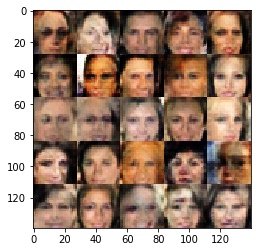

Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 1.2262
Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.5669
Epoch 1/1... Discriminator Loss: 1.2341... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.6134
Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.5792


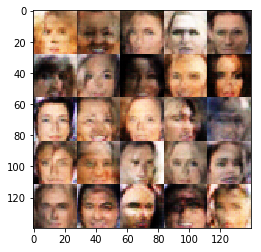

Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 1.0114
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.7353
Epoch 1/1... Discriminator Loss: 1.2238... Generator Loss: 1.2369
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 1.2134
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 1.0362
Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 1.0562
Epoch 1/1... Discriminator Loss: 1.6933... Generator Loss: 1.4360
Epoch 1/1... Discriminator Loss: 1.1416... Generator Loss: 0.9233
Epoch 1/1... Discriminator Loss: 1.5268... Generator Loss: 0.5798


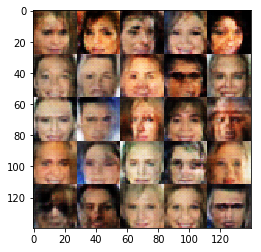

Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.9625
Epoch 1/1... Discriminator Loss: 1.1269... Generator Loss: 0.8722
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.1992... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.8546
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.2463... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 1.2350... Generator Loss: 0.9816


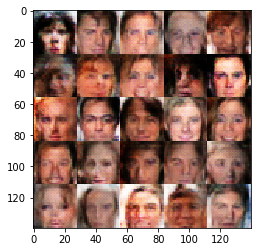

Epoch 1/1... Discriminator Loss: 1.6058... Generator Loss: 0.4464
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.0835... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.1648... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.8023
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.6392


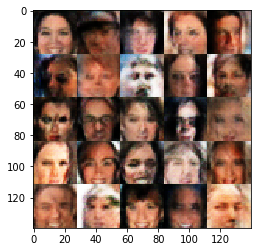

Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.5320
Epoch 1/1... Discriminator Loss: 1.5459... Generator Loss: 0.4803
Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.5225... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.3301... Generator Loss: 0.8553
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.9022
Epoch 1/1... Discriminator Loss: 1.1586... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.9351


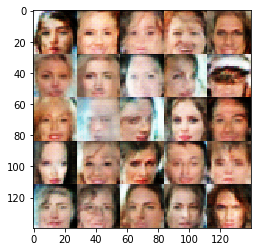

Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.5230
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 1.1957
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 1.1098
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 1.1119
Epoch 1/1... Discriminator Loss: 1.2009... Generator Loss: 0.9773
Epoch 1/1... Discriminator Loss: 1.2955... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 1.6272... Generator Loss: 0.4308
Epoch 1/1... Discriminator Loss: 1.2382... Generator Loss: 1.0146
Epoch 1/1... Discriminator Loss: 1.1365... Generator Loss: 0.9553


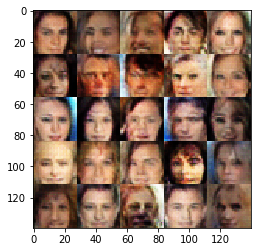

Epoch 1/1... Discriminator Loss: 1.1528... Generator Loss: 1.2325
Epoch 1/1... Discriminator Loss: 1.1252... Generator Loss: 1.0347
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 1.3341
Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 1.4416
Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.8174
Epoch 1/1... Discriminator Loss: 1.3288... Generator Loss: 0.6963
Epoch 1/1... Discriminator Loss: 1.4661... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 1.1438
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.5790
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6763


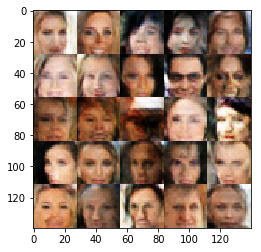

Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.7148
Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 1.1718... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.8360
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 1.1338


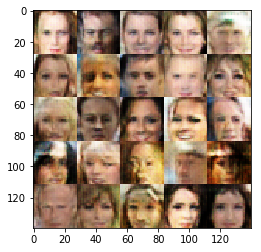

Epoch 1/1... Discriminator Loss: 1.6038... Generator Loss: 0.5041
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.2777... Generator Loss: 1.0983
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.4798... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.8253


In [28]:
batch_size = 64
z_dim = 200
learning_rate = 0.002
beta1 = 0.6


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.